# Build Spotify Song Recommendation System with Machine Learning Classification Algorithm

Hello world! In this project I've made a Spotify song recommendation system using Random Forest Classifier. First, I list 150 songs that I like on spotify, and made them into two playlists (one consist of 100 songs and the other 50 songs). Then, I search three playlists which I don't like the genre of the songs on those playlists, it is dangdut, punk rock, and k-pop genre. So now I got 3 playlists, 2 of them consist songs that I like and the other one I don't.

I scrape those playlist using "spotipy" package, then make a class for the songs that I like with 1 and the songs that I dislike with 0, and make it into pandas dataframe. Spotipy is a pretty nice package because it will extract each of the songs features, such as danceability, energy, key, etc. So, I can do an exploratory data analysis based on the songs that I like and dislike.

Before bulding a model, I scrape a random playlist so I can make the songs on that playlist as a test set. Then lastly, I make a model as a song recommendation system on the test set.

## Scrape Spotify Data

Import all the necessary packages

In [1]:
!pip install spotipy
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 138 kB 10.2 MB/s 
     |████████████████████████████████| 246 kB 66.8 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.28.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


Define a spotify_scraper function which will scrape the spotify playlists data and make the song's features in the playlists as a dataframe.

In [2]:
def spotify_scraper(credentials, playlists, train=True):
  client_id = credentials['client_id']
  client_secret = credentials['client_secret']
  result_df_list = []

  for playlist_index in range(len(playlists)):
    playlist_uri = playlists[playlist_index]['uri']
    try:
      like = playlists[playlist_index]['like']
    except:
      pass
    client_credentials_manager = SpotifyClientCredentials(client_id=client_id, 
                                                      client_secret=client_secret)
    sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

    results = sp.playlist(playlist_uri, 'tracks')
    playlist_tracks_data = results['tracks']
    playlist_tracks_id = []
    playlist_tracks_titles = []
    playlist_tracks_artists = []
    playlist_tracks_first_artists = []

    for track in playlist_tracks_data['items']:
      playlist_tracks_id.append(track['track']['id'])
      playlist_tracks_titles.append(track['track']['name'])

      artist_list = []
      for artist in track['track']['artists']:
        artist_list.append(artist['name'])
      playlist_tracks_artists.append(artist_list)
      playlist_tracks_first_artists.append(artist_list[0])
    
    features = sp.audio_features(playlist_tracks_id)

    if train:
      if like == 1:
        features_df_like = pd.DataFrame(features)
        features_df_like['title'] = playlist_tracks_titles
        features_df_like['first_artists'] = playlist_tracks_first_artists
        features_df_like['all_artists'] = playlist_tracks_artists
        features_df_like['like'] = like

        features_df_like.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
        result_df_list.append(features_df_like)
      
      else:
        features_df_dislike = pd.DataFrame(features)
        features_df_dislike['title'] = playlist_tracks_titles
        features_df_dislike['first_artists'] = playlist_tracks_first_artists
        features_df_dislike['all_artists'] = playlist_tracks_artists
        features_df_dislike['like'] = like

        features_df_dislike.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
        result_df_list.append(features_df_dislike)

    else:
      features_df = pd.DataFrame(features)
      features_df['title'] = playlist_tracks_titles
      features_df['first_artists'] = playlist_tracks_first_artists
      features_df['all_artists'] = playlist_tracks_artists

      features_df.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1, inplace=True)
      result_df_list.append(features_df)

  result_df = pd.concat(result_df_list, ignore_index=True)
  return result_df

Defining my client id and client secret as a dictionary. We can get those credentials by registering "Spotify for Developers" (Link: https://developer.spotify.com/).

In [3]:
credentials = {'client_id':'0b68f475ec1a48c8896de0504a3950b0',
               'client_secret':'f8a07845308f46929ebdccba13929914'}

So, for scraping spotify data, we cannot just pass the playlist link here, but we need the playlist's URI (Uniform Resource Indicator). We can get playlist's URI by pressing ALT when we hover our mouse on the playlist's share button.
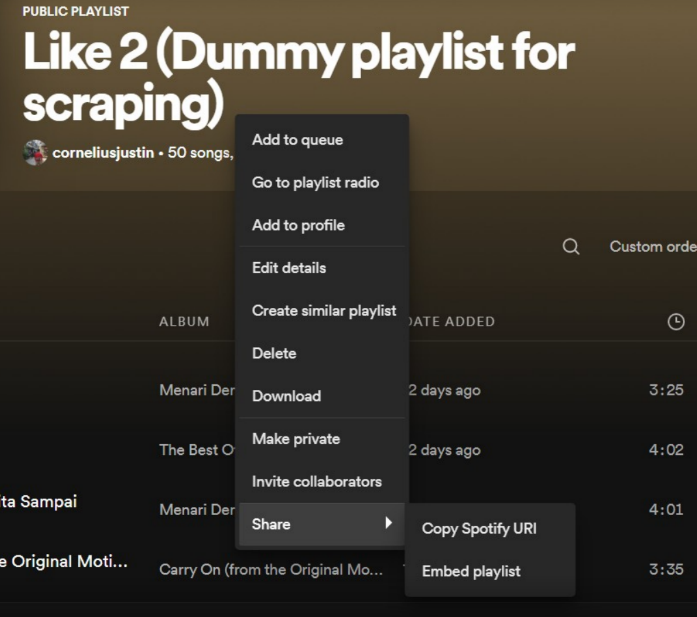

All URI of the playlists that I gathered for training, I made it into a dictionary, with the class attribute (like, 1 for like, 0 for dislike)

In [4]:
playlists = [{'uri':'spotify:playlist:2G4lqulpmlWAtNm6GRK4zE', 'like':1},
             {'uri':'spotify:playlist:65XTzR5YnpB6YCVWfA6UMN', 'like':1},
             {'uri':'spotify:playlist:710iWk6xFoyGcrCN6HS3H3', 'like':0},
             {'uri':'spotify:playlist:5efhhlrhxoabvpkDN9uCTD', 'like':0},
             {'uri':'spotify:playlist:3qlO6lE78f6mj7oxb356HT', 'like':0},]

Scrape the spotify playlists above, and save it into the train_df variable.

In [6]:
train_df = spotify_scraper(credentials, playlists, train=True)
train_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists,like
0,0.486,0.881,2,-5.623,0,0.0474,0.024400,0.000000,0.429,0.6670,144.997,480707,4,A Little Piece of Heaven,Avenged Sevenfold,[Avenged Sevenfold],1
1,0.356,0.960,4,-3.487,1,0.1040,0.014200,0.000000,0.209,0.0857,125.921,204733,4,Helena,My Chemical Romance,[My Chemical Romance],1
2,0.487,0.949,2,-4.217,0,0.0798,0.000429,0.000029,0.231,0.4060,110.020,352427,4,Afterlife,Avenged Sevenfold,[Avenged Sevenfold],1
3,0.366,0.963,11,-5.301,0,0.1420,0.000273,0.012200,0.115,0.2110,137.114,366213,4,Knights of Cydonia,Muse,[Muse],1
4,0.412,0.920,9,-4.852,0,0.0575,0.000456,0.002600,0.110,0.4550,93.162,227440,4,Hysteria,Muse,[Muse],1


As we can see above, we got detailed song's features, title, artist, etc. We also have the class attribute, that is "like" column.

Made a dictionary of playlist URI for test set 

In [7]:
test_playlists = [{'uri':'spotify:playlist:4S5miv8BZaJXPhRVqkgHvA'},
                  {'uri':'spotify:playlist:2Xhi7lIiI6XGHJHgcgp3ut'},
                  {'uri':'spotify:playlist:37i9dQZF1DWZrhFFq3bnGV'}]

Scrape the test set playlists and made them into pandas dataframe

In [8]:
test_df = spotify_scraper(credentials, test_playlists, train=False)
test_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,"[Bruno Mars, Anderson .Paak, Silk Sonic]"
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4,Memories,Maroon 5,[Maroon 5]
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4,Intentions (feat. Quavo),Justin Bieber,"[Justin Bieber, Quavo]"
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3,Stuck with U (with Justin Bieber),Ariana Grande,"[Ariana Grande, Justin Bieber]"
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4,Make You Mine,PUBLIC,[PUBLIC]


We can see above that there are no "like" column on the test set.

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      270 non-null    float64
 1   energy            270 non-null    float64
 2   key               270 non-null    int64  
 3   loudness          270 non-null    float64
 4   mode              270 non-null    int64  
 5   speechiness       270 non-null    float64
 6   acousticness      270 non-null    float64
 7   instrumentalness  270 non-null    float64
 8   liveness          270 non-null    float64
 9   valence           270 non-null    float64
 10  tempo             270 non-null    float64
 11  duration_ms       270 non-null    int64  
 12  time_signature    270 non-null    int64  
 13  title             270 non-null    object 
 14  first_artists     270 non-null    object 
 15  all_artists       270 non-null    object 
dtypes: float64(9), int64(4), object(3)
memory us

## Exploratory Data Analysis

Make sure that the train set are balanced

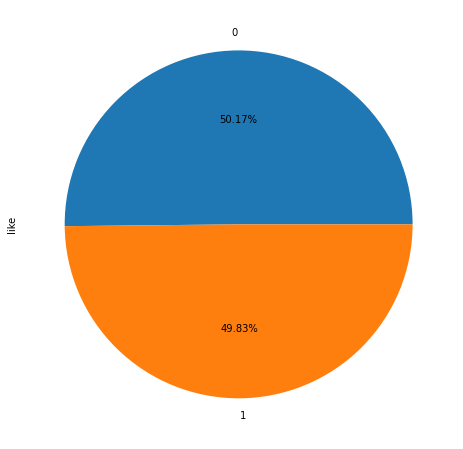

In [11]:
plt.subplots(figsize=(10,8))
train_df['like'].value_counts().plot.pie(autopct='%.2f%%')
plt.show()

The train set are balanced, with 49,83% of the data are songs that I like and the rest are the songs that I dislike.

Make a dataframe for only songs that I like (train_df_like) and a dataframe for only songs that I dislike (train_df_dislike)

In [12]:
train_df_like = train_df.loc[train_df['like']==1,:].copy()
train_df_dislike = train_df.loc[train_df['like']==0,:].copy()

Plot my most favourite artists on the "like" playlists.

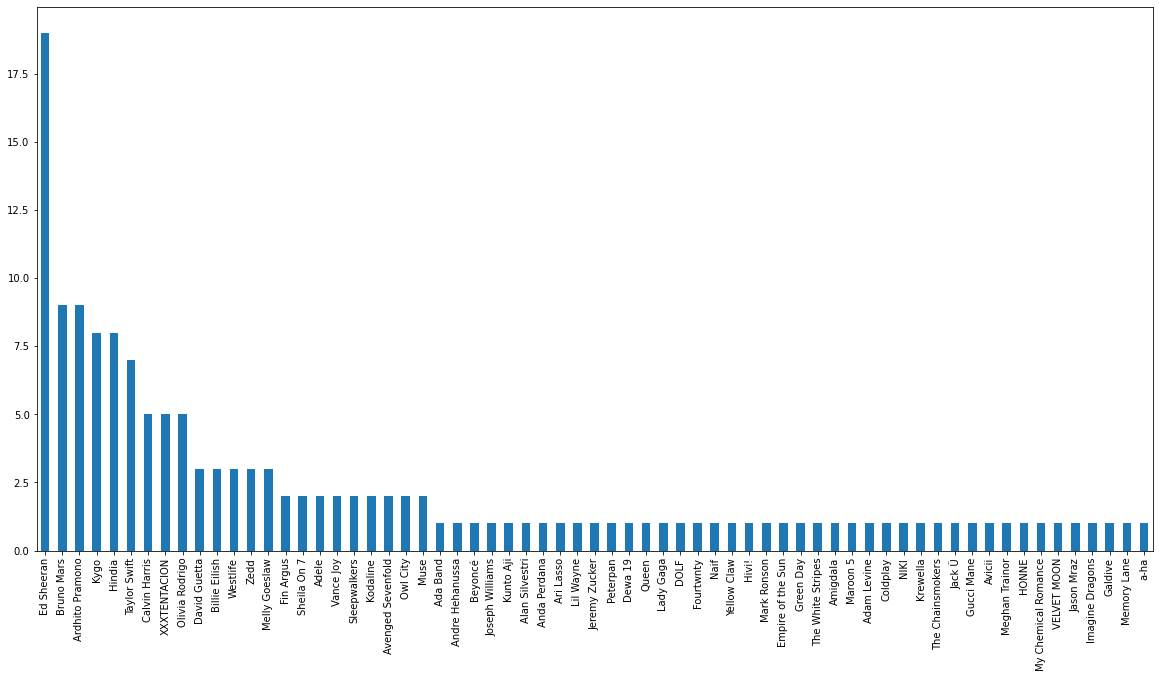

In [13]:
plt.subplots(figsize=(20,10))
train_df_like['first_artists'].value_counts().plot(kind='bar')
plt.show()

My favourite artists in the playlists are Ed Sheeran, followed by Bruno Mars, Ardhito Pramono, Kygo, Hindia, etc.

Plot the distribution of all the song's features (that is the columns with numeric variable type).

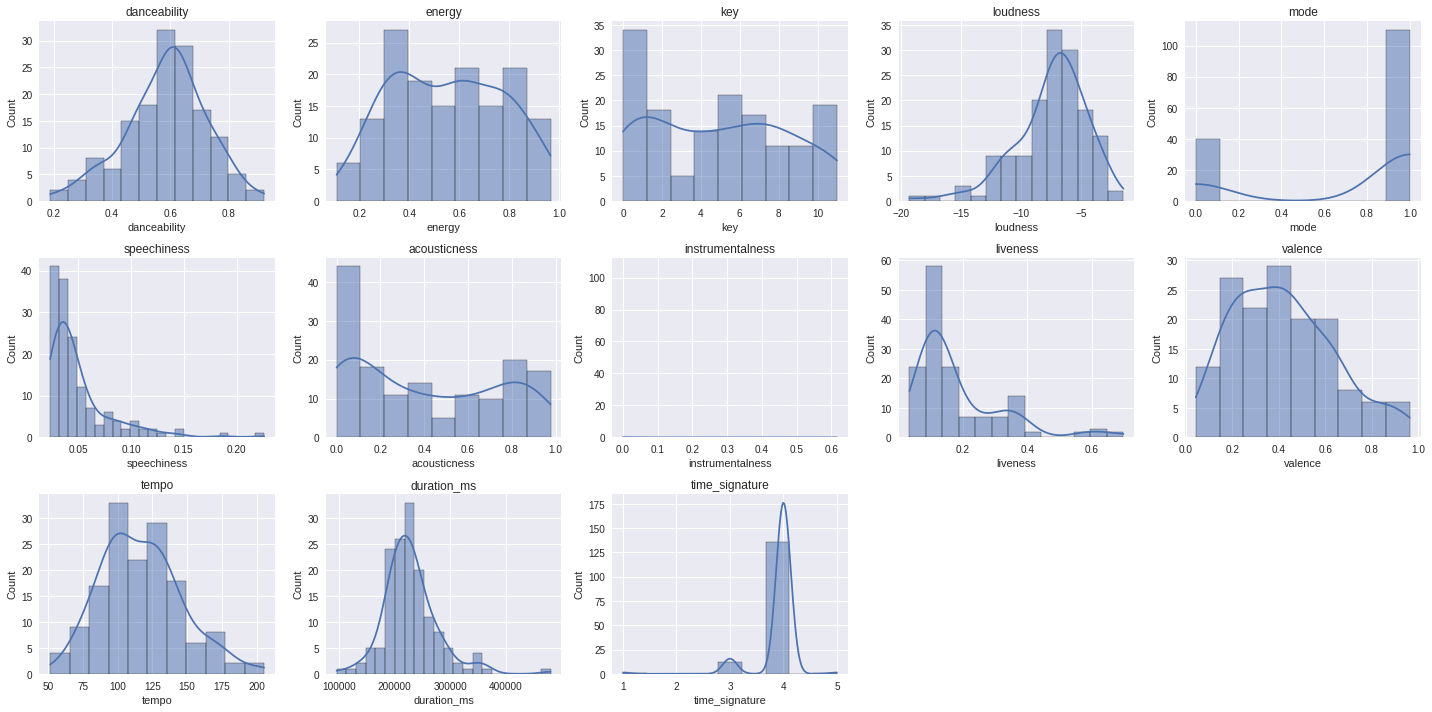

In [14]:
num_var = train_df_like.drop('like',axis=1).select_dtypes(exclude=["O"]).columns

plt.style.use("seaborn")
fig, axs = plt.subplots(3, 5, figsize=(20,10))

for i in range(15):
  ax = axs[i//5, i%5]
  try:
    sns.histplot(x=train_df_like[num_var[i]], kde=True, ax=ax)
    ax.set_title(num_var.values[i])
  except:
    axs[-1,i%5].axis('off')

plt.tight_layout()
plt.show()

Explanation of all songs features are avalaible here: https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features

Observation:
- danceability: Most of the songs that I like is average danceable (not so danceable, but not slow either). Mostly, it is range between 0.5 - 0.7.
- energy: The energy of my likes songs are pretty much uniformly distributed. Well I think this is true, because I listen to a song based on my mood.
- key: Most of the songs that I like are based on C key, because 0 has the most count values (based on spotify for developer docs, 0 = C, 1 = C#, and so on).

In [15]:
train_df_like['instrumentalness'].describe()

count    1.500000e+02
mean     1.582342e-02
std      7.031920e-02
min      0.000000e+00
25%      0.000000e+00
50%      5.100000e-07
75%      1.585000e-04
max      6.160000e-01
Name: instrumentalness, dtype: float64

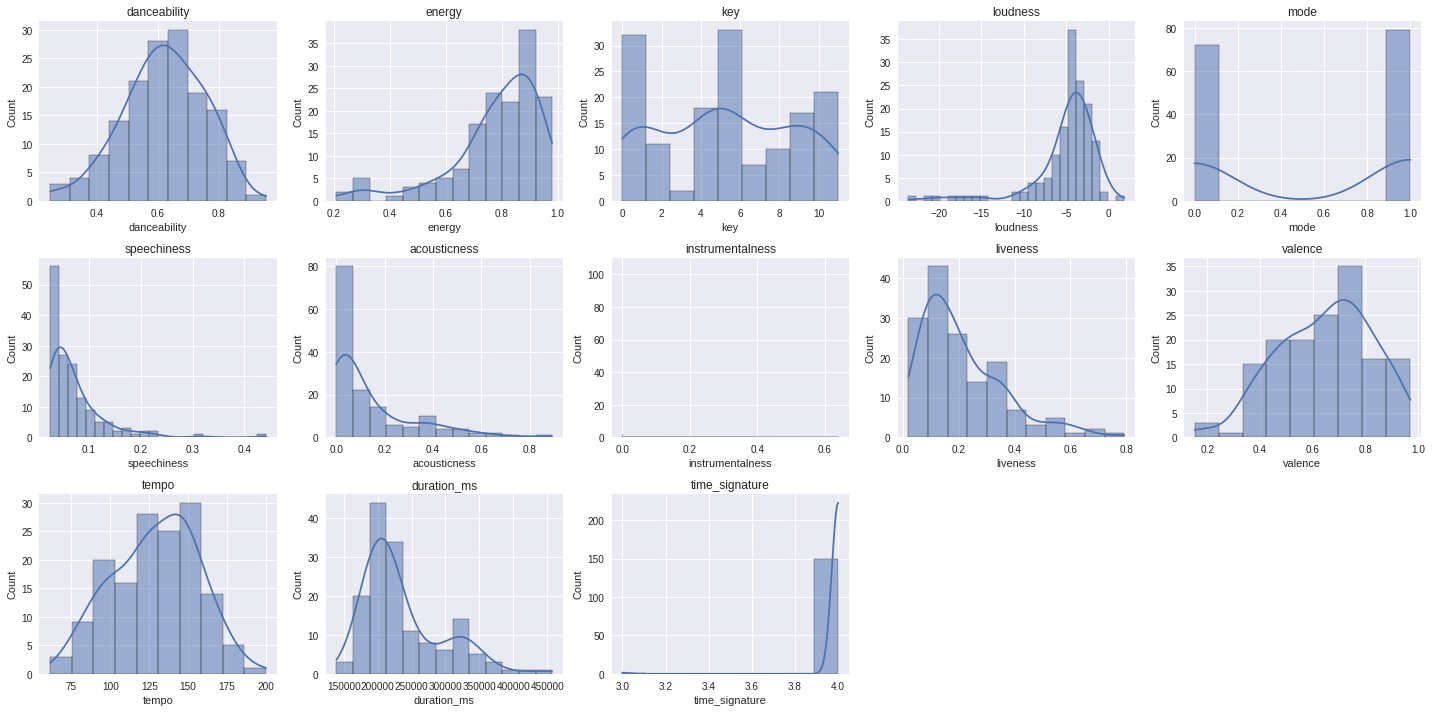

In [16]:
num_var = train_df_dislike.drop('like',axis=1).select_dtypes(exclude=["O"]).columns

plt.style.use("seaborn")
fig, axs = plt.subplots(3, 5, figsize=(20,10))

for i in range(15):
  ax = axs[i//5, i%5]
  try:
    sns.histplot(x=train_df_dislike[num_var[i]], kde=True, ax=ax)
    ax.set_title(num_var.values[i])
  except:
    axs[-1,i%5].axis('off')

plt.tight_layout()
plt.show()

In [17]:
train_df = train_df.sample(frac=1)

In [18]:
X = train_df.drop(['title', 'first_artists', 'all_artists', 'like'], axis=1).values
y = train_df['like'].values

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.15743618, -0.92893711,  0.25184399, ..., -1.49255106,
         0.24277601,  0.18328152],
       [ 0.16475823,  1.04292517, -0.31598403, ...,  0.79797258,
        -0.98535525,  0.18328152],
       [ 0.34048736,  0.35166558, -0.03207002, ...,  0.17253606,
        -0.09407639,  0.18328152],
       ...,
       [ 0.01831728,  0.60867235,  0.25184399, ...,  0.87882194,
        -0.75291541,  0.18328152],
       [-0.67727721, -1.57145404,  0.53575799, ..., -0.94751242,
        -0.50210653, -3.49456772],
       [ 0.04760547,  1.32208769,  0.53575799, ..., -0.72858012,
        -0.70151544,  0.18328152]])

## Modelling

### Searching the best classifier 

In [21]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
svm_clf = SVC(C=.5)
log_clf = LogisticRegression()
sgd_clf = SGDClassifier()
tree_clf = DecisionTreeClassifier()
forest_clf = RandomForestClassifier()
knn_clf = KNeighborsClassifier()
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=200,
                             learning_rate=.5)
gbct = GradientBoostingClassifier(max_depth=2, n_estimators=50, learning_rate=0.1)
voting_clf = VotingClassifier([('log', log_clf), ('gbct', gbct),
                               ('forest', forest_clf),
                               ('knn', knn_clf), ('svm', svm_clf)], 
                              voting='hard')

for model in (svm_clf, log_clf, sgd_clf, tree_clf, forest_clf, knn_clf, ada_clf, gbct, voting_clf):
  cv_result = cross_validate(model, X, y, scoring='f1', cv=5)
  cv_result_score_mean = cv_result['test_score'].mean()
  cv_result_score_std = cv_result['test_score'].std()
  cv_result_fit_time_mean = cv_result['fit_time'].mean()
  cv_result_fit_time_std = cv_result['fit_time'].std()
  cv_result_score_time_mean = cv_result['score_time'].mean()
  cv_result_score_time_std = cv_result['score_time'].std()

  print(model.__class__.__name__, ':')
  print('f1-score mean:', cv_result_score_mean)
  print('f1-score std:', cv_result_score_std)
  print('fit time mean:', cv_result_fit_time_mean)
  print('fit time std:', cv_result_fit_time_std)
  print('scoring time mean:', cv_result_score_time_mean)
  print('scoring time std:', cv_result_score_time_std)
  print('------------------------')

SVC :
f1-score mean: 0.7706114469248109
f1-score std: 0.040123166470449216
fit time mean: 0.0031013965606689455
fit time std: 0.00033119882911858547
scoring time mean: 0.0014476776123046875
scoring time std: 9.324172357812907e-05
------------------------
LogisticRegression :
f1-score mean: 0.7415108942799968
f1-score std: 0.034686811064243664
fit time mean: 0.0030462265014648436
fit time std: 0.00016993685585147214
scoring time mean: 0.0007304191589355469
scoring time std: 2.753692271580398e-05
------------------------
SGDClassifier :
f1-score mean: 0.7158476922529448
f1-score std: 0.05264080744207241
fit time mean: 0.000987100601196289
fit time std: 0.00018918092244614887
scoring time mean: 0.0007360458374023437
scoring time std: 2.47470675512437e-05
------------------------
DecisionTreeClassifier :
f1-score mean: 0.7329621048618156
f1-score std: 0.06789550313722258
fit time mean: 0.0016733169555664062
fit time std: 0.0001090608622071601
scoring time mean: 0.0007440090179443359
scorin

### Hyperparameter tuning

In [ ]:
params = {'n_estimators':[50,75,100,125],
          'criterion':['gini', 'entropy', 'log_loss'],
          'max_depth':[None,10,20,25,30,50,75,100,150],
          'max_features':['sqrt','log2',None],
          'bootstrap':[False, True]}
grid_search = GridSearchCV(RandomForestClassifier(), params, scoring='f1', 
                           cv=5, verbose=2)
grid_search.fit(X, y)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=75; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=75; total time=   0.2s
[CV] END bootstrap=False, criterion=gini, max_depth=None, max_features=sqrt, n_estimators=75; total time=   0.2s
[CV] END bootstrap=False, criter

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [False, True],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 10, 20, 25, 30, 50, 75, 100, 150],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [50, 75, 100, 125]},
             scoring='f1', verbose=2)

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
160,0.088610,0.002386,0.007527,0.000228,False,entropy,30,log2,50,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892857,0.833333,0.786885,0.918033,0.821429,0.850507,0.048045,1
163,0.215566,0.003025,0.015279,0.000215,False,entropy,30,log2,125,"{'bootstrap': False, 'criterion': 'entropy', '...",0.892857,0.786885,0.833333,0.888889,0.827586,0.845910,0.040073,2
501,0.214519,0.004753,0.012295,0.002156,True,entropy,50,None,75,"{'bootstrap': True, 'criterion': 'entropy', 'm...",0.872727,0.819672,0.819672,0.857143,0.847458,0.843334,0.020935,3
199,0.216267,0.008358,0.017805,0.004403,False,entropy,100,log2,125,"{'bootstrap': False, 'criterion': 'entropy', '...",0.872727,0.833333,0.800000,0.888889,0.821429,0.843276,0.032854,4
184,0.087915,0.002787,0.007375,0.000473,False,entropy,75,log2,50,"{'bootstrap': False, 'criterion': 'entropy', '...",0.872727,0.833333,0.819672,0.888889,0.800000,0.842924,0.033094,5


In [ ]:
final_model = grid_search.best_estimator_
final_model

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', n_estimators=50)

In [ ]:
cross_val_score(final_model, X, y, cv=5, scoring='f1').mean()

0.8436642453591606

### Train the model

In [ ]:
final_model.fit(X, y)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=30,
                       max_features='log2', n_estimators=50)

### Predict test set

In [ ]:
test_df_prepared = test_df.drop(['title', 'first_artists', 'all_artists'], axis=1)
test_df_prepared.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4


In [ ]:
test_df_prepared = scaler.transform(test_df_prepared.values)
test_df_prepared

array([[-0.12080162, -0.22881523, -0.03207002, ...,  0.87152883,
         0.18129253,  0.18328152],
       [ 1.1825228 , -1.54043598,  1.67141401, ..., -1.11042667,
        -0.79387969,  0.18328152],
       [ 1.49004879, -0.53899581,  1.103586  , ...,  0.86798646,
        -0.36049247,  0.18328152],
       ...,
       [-0.88961658, -0.17564141, -1.45164005, ..., -0.33940573,
        -0.78557562,  3.86113077],
       [ 1.39486217, -1.81516735,  0.25184399, ...,  0.2234142 ,
        -1.80469639,  0.18328152],
       [-0.24527642, -1.50941792, -1.45164005, ..., -1.01353246,
         0.8146818 ,  0.18328152]])

In [ ]:
y_pred = final_model.predict(test_df_prepared)

In [ ]:
test_pred_df = test_df.copy()
test_pred_df['like_prediction'] = y_pred
test_pred_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,title,first_artists,all_artists,like_prediction
0,0.586,0.616,5,-7.964,1,0.0324,0.1820,0.0,0.0927,0.719,148.088,242096,4,Leave The Door Open,Bruno Mars,"[Bruno Mars, Anderson .Paak, Silk Sonic]",1
1,0.764,0.320,11,-7.209,1,0.0546,0.8370,0.0,0.0822,0.575,91.019,189486,4,Memories,Maroon 5,[Maroon 5],1
2,0.806,0.546,9,-6.637,1,0.0575,0.3000,0.0,0.1020,0.874,147.986,212867,4,Intentions (feat. Quavo),Justin Bieber,"[Justin Bieber, Quavo]",1
3,0.597,0.450,8,-6.658,1,0.0418,0.2230,0.0,0.3820,0.537,178.765,228482,3,Stuck with U (with Justin Bieber),Ariana Grande,"[Ariana Grande, Justin Bieber]",1
4,0.606,0.799,9,-4.452,1,0.0261,0.0128,0.0,0.1500,0.638,103.014,232907,4,Make You Mine,PUBLIC,[PUBLIC],0


In [ ]:
test_pred_df = test_pred_df[['title', 'all_artists', 'like_prediction']]
test_pred_df

,title,all_artists,like_prediction
0,Leave The Door Open,"[Bruno Mars, Anderson .Paak, Silk Sonic]",1
1,Memories,[Maroon 5],1
2,Intentions (feat. Quavo),"[Justin Bieber, Quavo]",1
3,Stuck with U (with Justin Bieber),"[Ariana Grande, Justin Bieber]",1
4,Make You Mine,[PUBLIC],0
...,...,...,...
265,Would You Be Mine,"[Kevin Yosua, Sri Hanuraga, Elfa Zulham, Alex ...",1
266,Rintik Hujan,"[Gerald Situmorang, Sri Hanuraga]",1
267,Melawan Takdir,"[Hezky Jo, Azizah Hanum]",1
268,Summer,[Erikson Jayanto],1


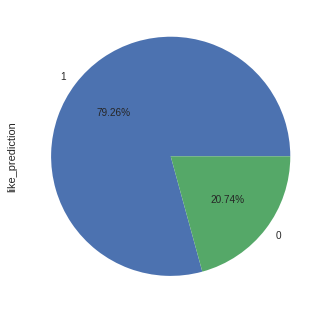

In [ ]:
test_pred_df.like_prediction.value_counts().plot.pie(autopct='%.2f%%')
plt.show()